In [ ]:
# importing the required libraries
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tabulate
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# reading the dataset
data = pd.read_csv('bodyfat.csv')
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
# scaling the data to range [0,1]
scaled_data = pd.DataFrame(MinMaxScaler().fit_transform(data), columns = data.columns)

# separating the features and target
X = scaled_data.drop(['BodyFat'], axis=1)
y = scaled_data['BodyFat']

# train-test-split (85/15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [ ]:
one_layer_models = []

# trying different regularizations and activations for models with 1 hidden layer
for reg in [None, 'l1', 'l2']:
  for act_func in ['sigmoid', 'relu']:
    model1 = tf.keras.Sequential()
    model1.add(tf.keras.layers.Flatten(input_shape=[14], name='inputLayer'))
    model1.add(tf.keras.layers.Dense(128, activation=act_func, kernel_regularizer=reg, name="hiddenLayer1"))
    model1.add(tf.keras.layers.Dense(1, activation='linear', name="outputLayer"))
    one_layer_models.append(model1)

In [ ]:
batch_size = 32
min_rmse = 100000

# training with different epochs and learning rates for models with 1 hidden layer
for model in one_layer_models:
  for epoch in [10, 20, 30, 40]:
    for lr in [1, 0.3, 0.1, 0.01, 0.03, 0.001, 0.0001, 0.00001]:
      optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
      model.compile(loss='mse', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])
      history1 = model.fit(X_train, y_train, batch_size, epoch, validation_split=0.15)
      rmse = model.evaluate(X_test, y_test)

      # recording the hyperparameters for the model with minimum rmse
      if rmse[1] < min_rmse:
        min_rmse = rmse[1]
        optimal_lr1 = lr
        optimal_epoch1 = epoch
        act1 = re.search(r'<function (\S+)', str(model.layers[1].activation)).group(1)
        reg1 = re.search(r'<keras.regularizers.(\S+)', str(model.layers[1].kernel_regularizer))
        if reg1:
          reg1 = reg1.group(1)
        loss1 = rmse[0]
        besthistory1 = history1

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 0s 8ms/step - loss: 0.0303 - root_mean_squared_error: 0.1735 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1884
Epoch 31/40
6/6 [==============================] - 0s 9ms/step - loss: 0.0303 - root_mean_squared_error: 0.1735 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1884
Epoch 32/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0303 - root_mean_squared_error: 0.1735 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1884
Epoch 33/40
6/6 [==============================] - 0s 11ms/step - loss: 0.0303 - root_mean_squared_error: 0.1735 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1884
Epoch 34/40
6/6 [==============================] - 0s 11ms/step - loss: 0.0303 - root_mean_squared_error: 0.1735 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1884
Epoch 35/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0303 - root_mean_squared_error: 0.1735 - 

In [ ]:
min_rmse1 = min_rmse

# printing the results and optimal hyperparameters
print("Minimum RMSE: ", min_rmse1)
print("Loss: ", loss1)

print("Best hyperparameter combinations with 1 hidden layer: \n")
print("Optimal learning rate: ", optimal_lr1)
print("Optimal number of epochs: ", optimal_epoch1)
print("Activation function used: ", act1)
print("Regularization used: ", reg1)

Minimum RMSE:  0.07103011012077332
Loss:  0.01167555432766676
Best hyperparameter combinations with 1 hidden layer: 

Optimal learning rate:  1e-05
Optimal number of epochs:  10
Activation function used:  relu
Regularization used:  L2


In [ ]:
two_layer_models = []

# trying different regularizations and activations for models with 2 hidden layers
for reg in [None, 'l1', 'l2']:
  for act_func in ['sigmoid', 'relu']:
    model2 = tf.keras.Sequential()
    model2.add(tf.keras.layers.Flatten(input_shape=[14], name='inputLayer'))
    model2.add(tf.keras.layers.Dense(128, activation=act_func, kernel_regularizer=reg, name="hiddenLayer1"))
    model2.add(tf.keras.layers.Dense(64, activation=act_func, kernel_regularizer=reg, name="hiddenLayer2"))
    model2.add(tf.keras.layers.Dense(1, activation='linear', name="outputLayer"))
    two_layer_models.append(model2)

In [ ]:
min_rmse = 100000

# training with different epochs and learning rates for models with 2 hidden layers
for model in two_layer_models:
  for epoch in [10, 20, 30, 40]:
    for lr in [1, 0.3, 0.1, 0.01, 0.03, 0.001, 0.0001, 0.00001]:
      optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
      model.compile(loss='mse', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])
      history2 = model.fit(X_train, y_train, batch_size, epoch, validation_split=0.15)
      rmse = model.evaluate(X_test, y_test)

      # recording the hyperparameters for the model with minimum rmse
      if rmse[1] < min_rmse:
        min_rmse = rmse[1]
        optimal_lr2 = lr
        optimal_epoch2 = epoch
        act2 = re.search(r'<function (\S+)', str(model.layers[1].activation)).group(1)
        reg2 = re.search(r'<keras.regularizers.(\S+)', str(model.layers[1].kernel_regularizer))
        if reg2:
          reg2 = reg2.group(1)
        loss2 = rmse[0]
        besthistory2 = history2

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 0s 12ms/step - loss: 0.0315 - root_mean_squared_error: 0.1735 - val_loss: 0.0370 - val_root_mean_squared_error: 0.1884
Epoch 31/40
6/6 [==============================] - 0s 11ms/step - loss: 0.0316 - root_mean_squared_error: 0.1735 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1884
Epoch 32/40
6/6 [==============================] - 0s 11ms/step - loss: 0.0315 - root_mean_squared_error: 0.1735 - val_loss: 0.0370 - val_root_mean_squared_error: 0.1884
Epoch 33/40
6/6 [==============================] - 0s 10ms/step - loss: 0.0315 - root_mean_squared_error: 0.1735 - val_loss: 0.0369 - val_root_mean_squared_error: 0.1884
Epoch 34/40
6/6 [==============================] - 0s 14ms/step - loss: 0.0316 - root_mean_squared_error: 0.1735 - val_loss: 0.0369 - val_root_mean_squared_error: 0.1884
Epoch 35/40
6/6 [==============================] - 0s 12ms/step - loss: 0.0315 - root_mean_squared_error: 0.173

In [ ]:
min_rmse2 = min_rmse

# printing the results and optimal hyperparameters
print("Minimum RMSE: ", min_rmse2)
print("Loss: ", loss2)

print("Best hyperparameter combinations with 2 hidden layers: \n")
print("Optimal learning rate: ", optimal_lr2)
print("Optimal number of epochs: ", optimal_epoch2)
print("Activation function used: ", act2)
print("Regularization used: ", reg2)

Minimum RMSE:  0.1708449125289917
Loss:  0.029187986627221107
Best hyperparameter combinations with 2 hidden layers: 

Optimal learning rate:  0.01
Optimal number of epochs:  10
Activation function used:  relu
Regularization used:  None


In [ ]:
three_layer_models = []

# trying different regularizations and activations for models with 3 hidden layers
for reg in [None, 'l1', 'l2']:
  for act_func in ['sigmoid', 'relu']:
    model3 = tf.keras.Sequential()
    model3.add(tf.keras.layers.Flatten(input_shape=[14], name='inputLayer'))
    model3.add(tf.keras.layers.Dense(128, activation=act_func, kernel_regularizer=reg, name="hiddenLayer1"))
    model3.add(tf.keras.layers.Dense(64, activation=act_func, kernel_regularizer=reg, name="hiddenLayer2"))
    model3.add(tf.keras.layers.Dense(32, activation=act_func, kernel_regularizer=reg, name="hiddenLayer3"))
    model3.add(tf.keras.layers.Dense(1, activation='linear', name="outputLayer"))
    three_layer_models.append(model3)

In [ ]:
min_rmse = 100000

# training with different epochs and learning rates for models with 2 hidden layers
for model in three_layer_models:
  for epoch in [10, 20, 30, 40]:
    for lr in [1, 0.3, 0.1, 0.01, 0.03, 0.001, 0.0001, 0.00001]:
      optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
      model.compile(loss='mse', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])
      history3 = model.fit(X_train, y_train, batch_size, epoch, validation_split=0.15)
      rmse = model.evaluate(X_test, y_test)

      # recording the hyperparameters for the model with minimum rmse
      if rmse[1] < min_rmse:
        min_rmse = rmse[1]
        optimal_lr3 = lr
        optimal_epoch3 = epoch
        act3 = re.search(r'<function (\S+)', str(model.layers[1].activation)).group(1)
        reg3 = re.search(r'<keras.regularizers.(\S+)', str(model.layers[1].kernel_regularizer))
        if reg3:
          reg3 = reg3.group(1)
        loss3 = rmse[0]
        besthistory3 = history3

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 0s 11ms/step - loss: 0.0318 - root_mean_squared_error: 0.1735 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1884
Epoch 31/40
6/6 [==============================] - 0s 10ms/step - loss: 0.0318 - root_mean_squared_error: 0.1735 - val_loss: 0.0370 - val_root_mean_squared_error: 0.1884
Epoch 32/40
6/6 [==============================] - 0s 9ms/step - loss: 0.0318 - root_mean_squared_error: 0.1735 - val_loss: 0.0373 - val_root_mean_squared_error: 0.1884
Epoch 33/40
6/6 [==============================] - 0s 10ms/step - loss: 0.0317 - root_mean_squared_error: 0.1735 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1884
Epoch 34/40
6/6 [==============================] - 0s 10ms/step - loss: 0.0318 - root_mean_squared_error: 0.1735 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1884
Epoch 35/40
6/6 [==============================] - 0s 10ms/step - loss: 0.0318 - root_mean_squared_error: 0.1735

In [ ]:
min_rmse3 = min_rmse

# printing the results and optimal hyperparameters
print("Minimum RMSE: ", min_rmse3)
print("Loss: ", loss3)

print("Best hyperparameter combinations with 3 hidden layers: \n")
print("Optimal learning rate: ", optimal_lr3)
print("Optimal number of epochs: ", optimal_epoch3)
print("Activation function used: ", act3)
print("Regularization used: ", reg3)

Minimum RMSE:  0.13467274606227875
Loss:  0.03443511947989464
Best hyperparameter combinations with 3 hidden layers: 

Optimal learning rate:  1e-05
Optimal number of epochs:  10
Activation function used:  relu
Regularization used:  L2


In [ ]:
# tabulating all the results for comparison

table = [['Layers', 'Learning Rate', 'Epochs', 'Activation', 'Regularization', 'RMSE', 'Loss'],
         [1, optimal_lr1, optimal_epoch1, act1, reg1, min_rmse1, loss1],
         [2, optimal_lr2, optimal_epoch2, act2, reg2, min_rmse2, loss2],
         [3, optimal_lr3, optimal_epoch3, act3, reg3, min_rmse3, loss3]]

print(tabulate.tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════╤═════════════════╤══════════╤══════════════╤══════════════════╤═══════════╤═══════════╕
│   Layers │   Learning Rate │   Epochs │ Activation   │ Regularization   │      RMSE │      Loss │
╞══════════╪═════════════════╪══════════╪══════════════╪══════════════════╪═══════════╪═══════════╡
│        1 │           1e-05 │       10 │ relu         │ L2               │ 0.0710301 │ 0.0116756 │
├──────────┼─────────────────┼──────────┼──────────────┼──────────────────┼───────────┼───────────┤
│        2 │           0.01  │       10 │ relu         │                  │ 0.170845  │ 0.029188  │
├──────────┼─────────────────┼──────────┼──────────────┼──────────────────┼───────────┼───────────┤
│        3 │           1e-05 │       10 │ relu         │ L2               │ 0.134673  │ 0.0344351 │
╘══════════╧═════════════════╧══════════╧══════════════╧══════════════════╧═══════════╧═══════════╛


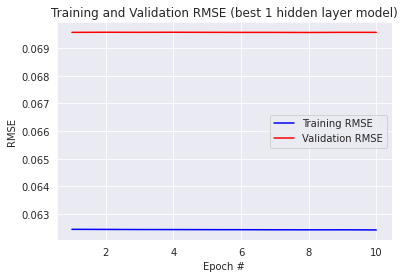

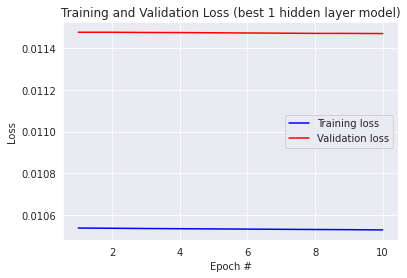

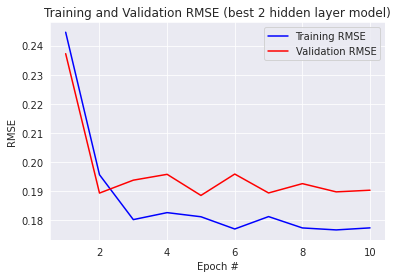

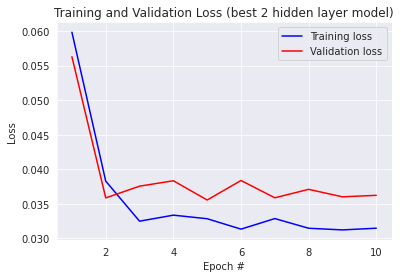

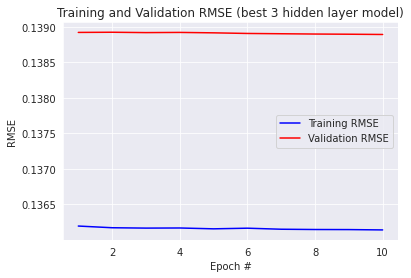

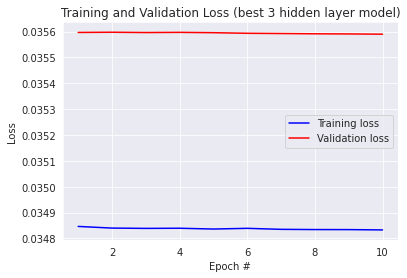

In [ ]:
besthistories = [besthistory1, besthistory2, besthistory3]

# plotting the training and validation rmse and loss

sns.set_style("darkgrid")
for idx, history in enumerate(besthistories):

  # get the details from the history object which has the training results
  rmse = history.history['root_mean_squared_error']
  val_rmse = history.history['val_root_mean_squared_error']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  epochs = range(1, len(rmse) + 1)

  # train and validation rmse
  plt.plot(epochs, rmse, 'b', label='Training RMSE')
  plt.plot(epochs, val_rmse, 'r', label='Validation RMSE')
  plt.xlabel('Epoch #')
  plt.ylabel('RMSE')
  plt.title(f'Training and Validation RMSE (best {idx + 1} hidden layer model)')
  plt.legend()

  # train and validation loss
  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epoch #')
  plt.ylabel('Loss')
  plt.title(f'Training and Validation Loss (best {idx + 1} hidden layer model)')
  plt.legend()

  plt.show()
  print('\n')

The results show that the model that performs best is the one that has 1 hidden layer, 0.00001 learning rate, relu activation function, L2 regularization and trains with 10 epochs. 

The model shows 0.071 RMSE and 0.011 loss on the test set.

We can conclude too many hidden layers may make the network too complex for the problem at hand (prediction on a small dataset). ReLU consistently performs better than sigmoid as an activation function. Performance does not significantly improve with too many epochs.